In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import accuracy_score,classification_report, recall_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Define the column names
columns = ['Temperature', 'Vibration', 'Pressure', 'Humidity', 'RPM', 'Voltage', 'Current', 'Sound_Level', 'Oil_Quality', 'Load','Machine Type',
           'Failure Type','Component Type']

# Generate random data for each column
num_rows = 100
data = {
    'Temperature': np.random.uniform(20, 100, num_rows),  # Temperature between 20 and 100
    'Vibration': np.random.uniform(0, 1, num_rows),  # Vibration between 0 and 1
    'Pressure': np.random.uniform(1, 10, num_rows),  # Pressure between 1 and 10
    'Humidity': np.random.uniform(30, 80, num_rows),  # Humidity between 30 and 80
    'RPM': np.random.uniform(1000, 5000, num_rows),  # RPM between 1000 and 5000
    'Voltage': np.random.uniform(110, 240, num_rows),  # Voltage between 110 and 240
    'Current': np.random.uniform(1, 10, num_rows),  # Current between 1 and 10
    'Sound_Level': np.random.uniform(60, 100, num_rows),  # Sound level between 60 and 100
    'Oil_Quality': np.random.uniform(0, 1, num_rows),  # Oil quality between 0 and 1
    'Load': np.random.uniform(0, 100, num_rows),  # Load between 0 and 100
    'Machine Type': np.random.choice(['Pump', 'Motor', 'Compressor', 'Turbine'], num_rows),  # Randomly assigns one of the four machine types to each row
    'Failure Type': np.random.choice(['Overheating', 'Vibration, Wear', 'Electrical', 'No Failure'], num_rows),  # Randomly assigns one of the four failure types to each row
    'Component Type': np.random.choice(['Bearing', 'Gear', 'Seal', 'Fan Blade'], num_rows)  # Randomly assigns one of the four component types to each row
}

# Combine columns to the data to create the dataset
pred = pd.DataFrame(data, columns=columns)

# Observe first five rows of the dataset
pred.head()

,Temperature,Vibration,Pressure,Humidity,RPM,Voltage,Current,Sound_Level,Oil_Quality,Load,Machine Type,Failure Type,Component Type
0,76.312579,0.665279,2.012212,79.615509,1330.221223,207.055886,5.730489,92.476799,0.067711,47.882325,Turbine,Overheating,Seal
1,59.822799,0.542034,8.653177,48.860702,3167.082981,214.159999,1.915510,97.952297,0.048003,93.451747,Motor,"Vibration, Wear",Bearing
2,81.088690,0.240205,4.124407,43.276028,2177.120336,162.788686,2.046808,71.188430,0.597733,88.932935,Pump,No Failure,Gear
3,22.103861,0.708862,6.643967,30.861842,4428.926261,146.662521,1.457584,90.812173,0.032496,5.427454,Pump,No Failure,Fan Blade
4,44.170040,0.306647,6.241297,42.054983,1077.566847,236.085295,1.200421,97.722480,0.847638,72.035714,Turbine,No Failure,Seal


In [3]:
# Observe last five rows of the dataset
pred.tail()

,Temperature,Vibration,Pressure,Humidity,RPM,Voltage,Current,Sound_Level,Oil_Quality,Load,Machine Type,Failure Type,Component Type
95,35.019146,0.962260,4.092253,70.395267,3666.431692,211.302015,3.598317,89.389246,0.329098,79.847361,Pump,"Vibration, Wear",Bearing
96,92.276321,0.582283,4.954579,51.650192,2289.277409,220.051975,5.687351,84.968740,0.359621,28.940085,Motor,Overheating,Seal
97,47.367143,0.448871,4.671303,41.441453,3740.866424,181.510027,2.672721,86.035904,0.041295,28.853846,Motor,No Failure,Bearing
98,91.812906,0.294256,5.151825,30.416233,3969.253928,180.800631,5.460740,76.456503,0.963306,10.766209,Pump,"Vibration, Wear",Seal
99,47.400294,0.140511,1.423791,79.507735,2743.925809,198.199443,4.297800,94.707738,0.463428,64.627166,Motor,Overheating,Gear


# Exploratory Data Analysis

In [4]:
# Check data type
pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     100 non-null    float64
 1   Vibration       100 non-null    float64
 2   Pressure        100 non-null    float64
 3   Humidity        100 non-null    float64
 4   RPM             100 non-null    float64
 5   Voltage         100 non-null    float64
 6   Current         100 non-null    float64
 7   Sound_Level     100 non-null    float64
 8   Oil_Quality     100 non-null    float64
 9   Load            100 non-null    float64
 10  Machine Type    100 non-null    object 
 11  Failure Type    100 non-null    object 
 12  Component Type  100 non-null    object 
dtypes: float64(10), object(3)
memory usage: 10.3+ KB


In [5]:
# Gather basic statistics
pred.describe()

,Temperature,Vibration,Pressure,Humidity,RPM,Voltage,Current,Sound_Level,Oil_Quality,Load
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,59.837413,0.489929,5.261739,56.925647,2921.883285,175.723615,5.304606,83.865598,0.469902,50.525614
std,24.074618,0.298278,2.684514,15.312800,1164.562788,38.271628,2.612147,10.459000,0.294903,28.800902
min,20.741050,0.013422,1.034078,30.416233,1067.463422,110.033894,1.200421,63.088937,0.020345,0.513354
25%,37.333981,0.228871,2.692514,43.271612,1969.022209,140.137729,3.190649,75.247863,0.232375,28.095405
50%,59.019104,0.457148,5.043675,59.210190,2791.565739,181.674629,5.228619,85.079775,0.442460,49.377091
75%,81.972900,0.725801,7.628818,70.641181,3942.519449,207.416179,7.403215,92.446549,0.736049,72.588144
max,99.898271,0.990366,9.871073,79.615509,4987.803862,239.978238,9.944139,99.358435,0.996995,98.442880


             Temperature  Vibration  Pressure  Humidity       RPM   Voltage  \
Temperature     1.000000  -0.027355 -0.076512 -0.169055 -0.084427  0.097155   
Vibration      -0.027355   1.000000 -0.122629  0.058088  0.276974 -0.012831   
Pressure       -0.076512  -0.122629  1.000000 -0.258474  0.068396 -0.092215   
Humidity       -0.169055   0.058088 -0.258474  1.000000 -0.075192  0.038561   
RPM            -0.084427   0.276974  0.068396 -0.075192  1.000000 -0.141070   
Voltage         0.097155  -0.012831 -0.092215  0.038561 -0.141070  1.000000   
Current        -0.070951  -0.010411 -0.033811  0.139233 -0.109959 -0.040036   
Sound_Level    -0.008901   0.018350  0.125047 -0.035259  0.008558  0.185913   
Oil_Quality     0.065300  -0.146416  0.057212  0.168505 -0.014852 -0.045992   
Load           -0.048996   0.028297  0.156188  0.094715 -0.071179  0.022929   

              Current  Sound_Level  Oil_Quality      Load  
Temperature -0.070951    -0.008901     0.065300 -0.048996  
Vibration 

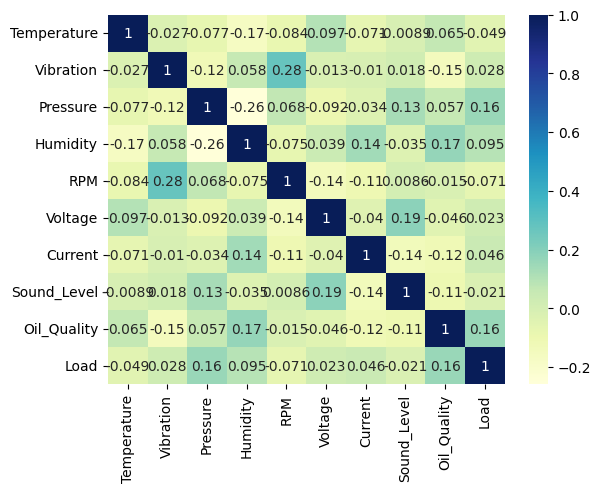

In [6]:
# Compute correlation matrix
co_mtx = pred.corr(numeric_only=True)

# Print correlation matrix
print(co_mtx)

# Plot correlation heatmap
sns.heatmap(co_mtx, cmap="YlGnBu", annot=True)

# Display heatmap
plt.show()

# Random Forest

In [7]:
 #Encode all of the categorical variables
for col in pred:
    if pred[col].dtype == 'O':
        codes, _ = pd.factorize(pred[col])
        pred[col] = codes

In [8]:
# Create the feature and target variables

X = pred[['Temperature', 'Vibration', 'Pressure', 'Humidity', 'RPM', 'Voltage', 'Current', 'Sound_Level', 'Oil_Quality','Load',
          'Failure Type','Component Type','Machine Type']]  # Features
y = pred['Component Type']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Train a random forest classifier on the training data
model = RandomForestClassifier(n_estimators=150, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model using accuracy score and classification report
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred, average='weighted'))
print('Precision:', precision_score(y_test, y_pred, average='weighted'))
print('F1 Score:', f1_score(y_test, y_pred, average='weighted'))
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.95
Recall: 0.95
Precision: 0.95625
F1 Score: 0.9488888888888889
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.88      1.00      0.93         7
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         5

    accuracy                           0.95        20
   macro avg       0.97      0.95      0.96        20
weighted avg       0.96      0.95      0.95        20



In [10]:
# Train a random forest regressor on the training data
model = RandomForestRegressor(n_estimators=150, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model using mean absolute error
print('Mean Absolute Error:', np.mean(np.abs(y_test - y_pred)))

Mean Absolute Error: 0.0


# Bagging

In [11]:
# Create the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [12]:
# Make prediction on the testing data
y_pred = pipeline.predict(X_test)

# Classification Report
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred, average='weighted'))
print('Precision:', precision_score(y_test, y_pred, average='weighted'))
print('F1 Score:', f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_pred, y_test))

Accuracy: 1.0
Recall: 1.0
Precision: 1.0
F1 Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [13]:
# Evaluate the classifier using cross-validation
cv = cross_val_score(pipeline, X, y, cv=10)

print(f"Cross-validation scores: {cv}")
print(f"Mean CV accuracy: {np.mean(cv):.2f}")

Cross-validation scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean CV accuracy: 1.00


In [14]:
# Create a bagging classifier with the decision tree pipeline
bagging_classifier = BaggingClassifier(estimator=pipeline, n_estimators=150, random_state=42)

# Train the bagging classifier on the training data
bagging_classifier.fit(X_train, y_train)

BaggingClassifier(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                            ('classifier',
                                             DecisionTreeClassifier(random_state=42))]),
                  n_estimators=150, random_state=42)

In [15]:
# Make prediction on the testing data
y_pred = bagging_classifier.predict(X_test)

# Classification Report
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred, average='weighted'))
print('Precision:', precision_score(y_test, y_pred, average='weighted'))
print('F1 Score:', f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_pred, y_test))

Accuracy: 1.0
Recall: 1.0
Precision: 1.0
F1 Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [16]:
# Evaluate the classifier using cross-validation
cv = cross_val_score(bagging_classifier, X, y, cv=10)

print(f"Cross-validation scores: {cv}")
print(f"Mean CV accuracy: {np.mean(cv):.2f}")

Cross-validation scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean CV accuracy: 1.00


# Neural Networks

In [17]:
# Create LSTM model
model = Sequential()
model.add(LSTM(60, input_shape=(X_train.shape[1], 1)))
model.add(Dense(4, activation='softmax'))

# Compile model
# loss function changed to sparse_categorical_crossentropy
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=100, batch_size=35, validation_data=(X_test, y_test))

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 254ms/step - accuracy: 0.2696 - loss: 1.4000 - val_accuracy: 0.2500 - val_loss: 1.3754
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.2107 - loss: 1.3842 - val_accuracy: 0.2500 - val_loss: 1.3684
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.3250 - loss: 1.3734 - val_accuracy: 0.3000 - val_loss: 1.3598
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.2973 - loss: 1.3748 - val_accuracy: 0.2500 - val_loss: 1.3516
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.2741 - loss: 1.3649 - val_accuracy: 0.2500 - val_loss: 1.3420
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.3375 - loss: 1.3559 - val_accuracy: 0.3500 - val_loss: 1.3343
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.3366 - loss: 1.3599 - val_accuracy: 0.4000 - val_loss: 1.3362
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.3723 - loss: 1.3524 - val_accuracy: 0.4500 - val_loss